# 클러스터링(K-Means)

In [2]:
# 모듈 선언
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import jaccard_similarity_score
# 자카드 유사도 - (두 집합의 교집합 수) / (두 집합의 합집합 수)
y_pred = [0, 1, 2, 7]
y_true = [0, 1, 2, 7]
print(jaccard_similarity_score(y_true, y_pred))
print(jaccard_similarity_score(y_true, y_pred, normalize=False))

1.0
4


## Example 1 - 계층적 클러스터링와 KMeans 클러스터링

### 계층적 클러스터링

In [4]:
# scipy 덴드로그램
data1 = pd.read_csv('data/sample2d.csv') # 주어진 데이터를 read
data1 # 출력

,x,y,name
0,4.0,3.5,A
1,3.5,4.0,B
2,4.0,4.0,C
3,5.0,5.0,D
4,5.0,5.5,E
5,5.5,5.0,F
6,4.0,6.0,G
7,6.5,4.5,H


In [5]:
# data1의 원소들중 무작위 n개 추출 => data1.sample(n)
ksample = data1.sample(8) # 8중 8개를 추출하여, 원소의 순서만 바꾼 결과가 됨
print(ksample)

     x    y name
6  4.0  6.0    G
7  6.5  4.5    H
3  5.0  5.0    D
2  4.0  4.0    C
1  3.5  4.0    B
0  4.0  3.5    A
5  5.5  5.0    F
4  5.0  5.5    E


In [7]:
ksample = data1.drop('name', axis=1) # 'name' 순으로 정렬
print(ksample)

     x    y
0  4.0  3.5
1  3.5  4.0
2  4.0  4.0
3  5.0  5.0
4  5.0  5.5
5  5.5  5.0
6  4.0  6.0
7  6.5  4.5


In [9]:
# scipy Linkage
Z = linkage(ksample, metric='euclidean', method='ward') # 유클리드 거리를 이용해 Linkage Matrix를 생성
Z

array([[  0.        ,   2.        ,   0.5       ,   2.        ],
       [  3.        ,   4.        ,   0.5       ,   2.        ],
       [  1.        ,   8.        ,   0.64549722,   3.        ],
       [  5.        ,   9.        ,   0.64549722,   3.        ],
       [  6.        ,  11.        ,   1.75594229,   4.        ],
       [  7.        ,  12.        ,   2.33452351,   5.        ],
       [ 10.        ,  13.        ,   3.74277081,   8.        ]])

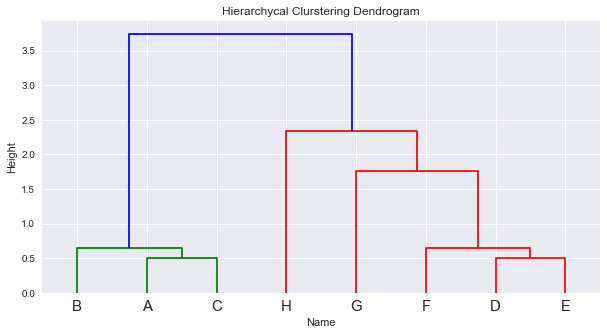

In [11]:
# 상단에서 구한 Linkage Matrix를 출력
plt.clf()
plt.figure(figsize=(10, 5))
plt.title('Hierarchycal Clurstering Dendrogram')
plt.xlabel('Name')
plt.ylabel('Height')
dendrogram(Z, leaf_font_size=15, labels=list(data1['name']))
plt.show()

### KMeans 클러스터링

In [23]:
ksample.values # k sample에 속한 원소의 값을 출력
# 즉 pandas dataframe엔 array가 있다.

array([[ 4. ,  3.5],
       [ 3.5,  4. ],
       [ 4. ,  4. ],
       [ 5. ,  5. ],
       [ 5. ,  5.5],
       [ 5.5,  5. ],
       [ 4. ,  6. ],
       [ 6.5,  4.5]])

In [25]:
type(ksample)

pandas.core.frame.DataFrame

In [26]:
X = ksample.values # k sample에 속한 원소의 값의 type을 출력
type(X) # array의 type은 numpy의 n dimension array

numpy.ndarray

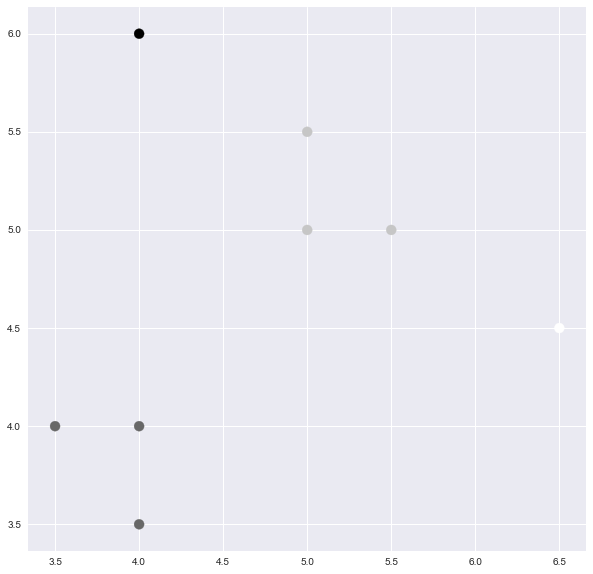

In [55]:
# sklearn모듈의 KMeans함수를 사용해 clustering을 
k = KMeans(n_clusters= 4).fit(ksample)
plt.clf()
plt.figure(figsize=(10, 10))
plt.scatter(ksample['x'], ksample['y'], c=k.labels_[:] ,s=100)
# 결과를 출력 => ksample의 좌표를 찍고, color를 클러스터값으로 칠한다
plt.show()

### 실습예제 1
sklearn 모듈의 KMeans 알고리즘을 사용하여, KSample을 3그룹으로 clustering 한 뒤 출력해 보시오.

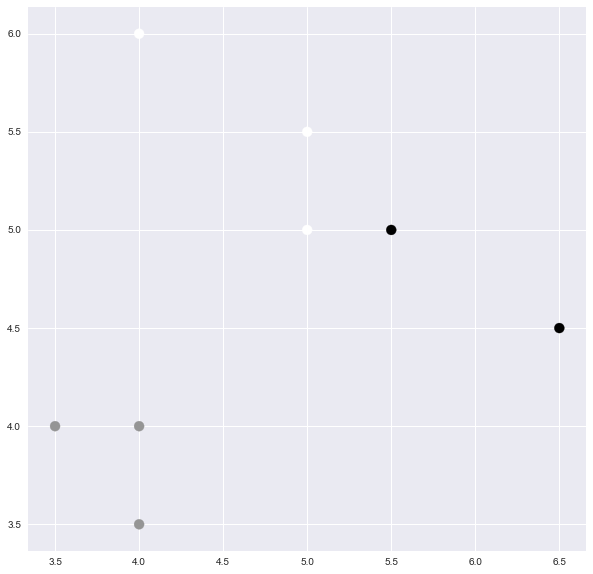

In [57]:
# sklearn모듈의 KMeans함수를 사용해 clustering을 
k = KMeans(n_clusters= 3).fit(ksample)
plt.clf()
plt.figure(figsize=(10, 10))
plt.scatter(ksample['x'], ksample['y'], c=k.labels_[:] ,s=100)
# 결과를 출력 => ksample의 좌표를 찍고, color를 클러스터값으로 칠한다
plt.show()

## Example 2 - 운동선수 클러스터링
운동 선수들의 키와 몸무게의 정보를 이용하여, 같은 운동을 하는 선수들의 그룹을 예상하여 만들어 보는 예제이다.

In [43]:
heightweight = pd.read_csv('data/heightweight.csv') # 높이와 무게의 data를 read

In [44]:
heightweight.info() # 읽어온 data의 information을 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Height    36 non-null int64
Weight    36 non-null int64
dtypes: int64(2)
memory usage: 656.0 bytes


In [45]:
heightweight.describe() # heightweight의 수, 편차, 평균, 최소값, 최대값, 등을 출력하는 함수

,Height,Weight
count,36.000000,36.000000
mean,171.361111,67.361111
std,15.133978,14.799909
min,143.000000,40.000000
25%,160.000000,58.500000
50%,170.000000,67.500000
75%,178.000000,78.000000
max,203.000000,92.000000


In [46]:
# z 정규화
zscore = lambda x : (x - x.mean())/ x.std() # 정규화 식을 lamda를 이용해 함수 zscore 생성
heightweight_z = heightweight.apply(zscore) # 정규화 함수를 이용해 새로운 dataframe 생성
heightweight_z

,Height,Weight
0,-0.089937,0.245872
1,-1.411467,-1.443327
2,0.636904,-0.227104
3,-1.874002,-1.646031
4,-0.089937,0.583712
5,-1.015008,-0.497375
6,1.363745,0.853984
7,-0.750702,-1.510895
8,-1.741849,-1.848735
9,-0.948932,-1.240623


In [47]:
cluster1 = KMeans(n_clusters= 3).fit(heightweight_z) # 3 그룹으로 클러스터링
cluster1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
#데이터에 clurster colum 추가
heightweight['cluster'] = cluster1.labels_[:] # example1과 다르게 dataframe 내부에 정보 삽입
heightweight

,Height,Weight,cluster
0,170,71,0
1,150,46,1
2,181,64,0
3,143,43,1
4,170,76,0
5,156,60,1
6,192,80,2
7,160,45,1
8,145,40,1
9,157,49,1


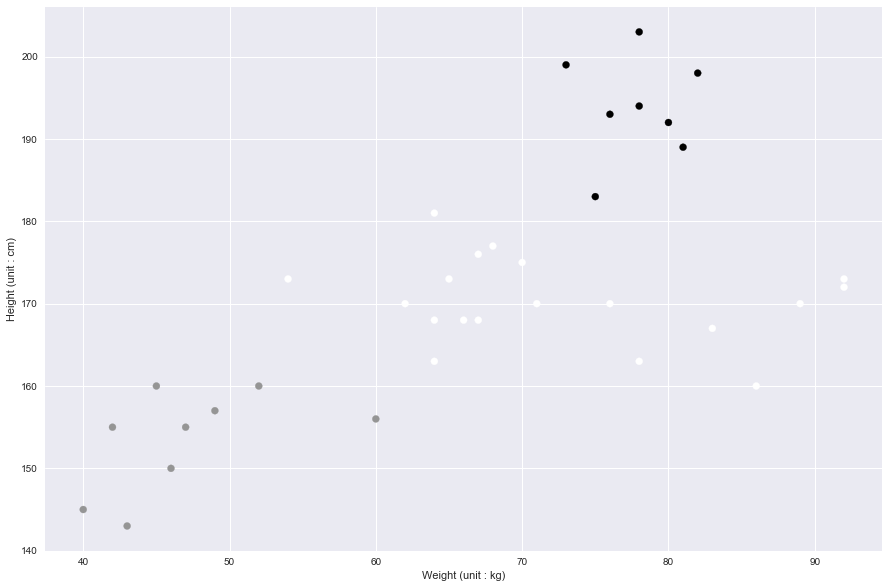

In [49]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.ylabel('Height (unit : cm)')
plt.xlabel('Weight (unit : kg)')
plt.scatter(heightweight['Weight'], heightweight['Height'], c=heightweight['cluster'])
# dataframe 내부에 clurster정보가 존재하기 때문에 color에 cluster1.labels_[:]를 사용하지 않음
plt.show()

### 실습예제 2
sklearn 모듈의 kmeans 함수를 이용해 heightweight를 5그룹으로 clustering 한 뒤 출력 해 보시오. 
(단, cluster정보는 dataframe 내부에 존재해야 한다.)

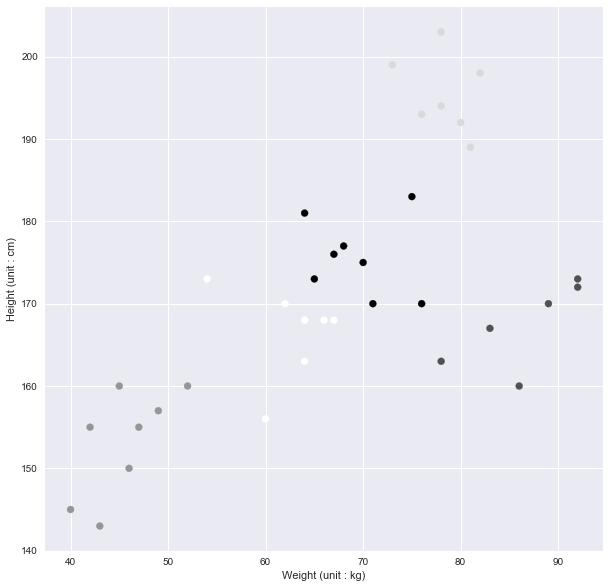

In [60]:
cluster2 = KMeans(n_clusters= 5).fit(heightweight_z) # 5 그룹으로 클러스터링
cluster2
#데이터에 clurster colum 추가
heightweight['cluster2'] = cluster2.labels_[:] # example1과 다르게 dataframe 내부에 정보 삽입
heightweight
plt.clf()
plt.figure(figsize=(10, 10))
plt.ylabel('Height (unit : cm)')
plt.xlabel('Weight (unit : kg)')
plt.scatter(heightweight['Weight'], heightweight['Height'], c=heightweight['cluster2'])
# dataframe 내부에 clurster정보가 존재하기 때문에 color에 cluster1.labels_[:]를 사용하지 않음
plt.show()

## Example 3 - 자동차 클러스터링
자동차들의 정보들을 이용하여 클러스터링하는 예제
- MPG(1갤런으로 갈 수 있는 마일)
- GPM(100마일을 가는데 필요한 갤런)
- WT(차의 무게 1000파운드 단위)
- DIS(배기량)
- NC(실린더 수)
- HP(마력 수)
- ACC(가속도)
- ET(엔진 유형)

In [74]:
fuel = pd.read_csv('data/FuelEfficiency.csv') # data read
fuel.head(20)

,MPG,GPM,WT,DIS,NC,HP,ACC,ET
0,16.9,5.917,4.360,350,8,155,14.9,1
1,15.5,6.452,4.054,351,8,142,14.3,1
2,19.2,5.208,3.605,267,8,125,15.0,1
3,18.5,5.405,3.940,360,8,150,13.0,1
4,30.0,3.333,2.155,98,4,68,16.5,0
5,27.5,3.636,2.560,134,4,95,14.2,0
6,27.2,3.676,2.300,119,4,97,14.7,0
7,30.9,3.236,2.230,105,4,75,14.5,0
8,20.3,4.926,2.830,131,5,103,15.9,0
9,17.0,5.882,3.140,163,6,125,13.6,0


In [75]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
MPG    38 non-null float64
GPM    38 non-null float64
WT     38 non-null float64
DIS    38 non-null int64
NC     38 non-null int64
HP     38 non-null int64
ACC    38 non-null float64
ET     38 non-null int64
dtypes: float64(4), int64(4)
memory usage: 2.5 KB


In [76]:
fuel.describe()

,MPG,GPM,WT,DIS,NC,HP,ACC,ET
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,24.760526,4.330605,2.862895,177.289474,5.394737,101.736842,14.857895,0.289474
std,6.547314,1.156002,0.706870,88.876747,1.603029,26.444929,1.561294,0.459606
min,15.500000,2.681000,1.915000,85.000000,4.000000,65.000000,11.300000,0.000000
25%,18.525000,3.292500,2.207500,105.000000,4.000000,78.500000,14.025000,0.000000
50%,24.250000,4.159500,2.685000,148.500000,4.500000,100.000000,14.800000,0.000000
75%,30.375000,5.397750,3.410000,229.500000,6.000000,123.750000,15.775000,1.000000
max,37.300000,6.452000,4.360000,360.000000,8.000000,155.000000,19.200000,1.000000


In [77]:
# Number of Cylinders
fuel['NC'].value_counts()

4    19
6    10
8     8
5     1
Name: NC, dtype: int64

In [78]:
fuel_z = fuel.apply(zscore)

In [79]:
fuel_clusters = KMeans(n_clusters=5).fit(fuel_z)
fuel_clusters.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [80]:
#데이터에 clurster colum 추가
fuel_z['clurster'] = fuel_clusters.labels_[:]
fuel_z

,MPG,GPM,WT,DIS,NC,HP,ACC,ET,clurster
0,-1.200573,1.372312,2.117935,1.943259,1.625213,2.014116,0.026968,1.545947,1
1,-1.414401,1.835114,1.685040,1.954510,1.625213,1.522528,-0.357328,1.545947,1
2,-0.849284,0.758991,1.049846,1.009381,1.625213,0.879683,0.091018,1.545947,1
3,-0.956198,0.929406,1.523766,2.055774,1.625213,1.825044,-1.189971,1.545947,1
4,0.800248,-0.862979,-1.001449,-0.892128,-0.870064,-1.275740,1.051759,-0.629830,0
5,0.418412,-0.600869,-0.428501,-0.487073,-0.870064,-0.254750,-0.421378,-0.629830,2
6,0.372592,-0.566267,-0.796320,-0.655846,-0.870064,-0.179121,-0.101131,-0.629830,2
7,0.937709,-0.946889,-0.895348,-0.813368,-0.870064,-1.011039,-0.229230,-0.629830,0
8,-0.681276,0.515047,-0.046536,-0.520828,-0.246244,0.047766,0.667463,-0.629830,3
9,-1.185299,1.342035,0.392017,-0.160779,0.377575,0.879683,-0.805675,-0.629830,3


In [62]:
plt.clf()
plt.figure(figsize=(15, 10))
plt.xlabel('WT')
plt.ylabel('DIS')
plt.scatter(fuel['WT'], fuel['DIS'], c=fuel_z['clurster']) # 클러스터링 된 자료를 무게와 배기량의 관계로 표현
plt.show()

NameError: name 'fuel' is not defined

### 실습예제 3
상단의 클러스터링 예제를 실린더 수, 마력 수 의 관계로 그래프를 출력하시오

In [61]:
plt.clf()
plt.figure(figsize = (15,10))
plt.xlabel('NC')
plt.ylabel('HP')
plt.scatter(fuel['NC'], fuel['HP'], c=fuel_z['clurster']) # 클러스터링 된 자료를 무게와 배기량의 관계로 표현
plt.show()

NameError: name 'fuel' is not defined